# SVM & Naive bayes

## Theoretical



----
### 1. What is a Support Vector Machine (SVM)?
SVM is a supervised machine learning algorithm used for classification and regression tasks. It finds the optimal hyperplane that best separates data into classes by maximizing the margin between data points of different classes.

----
### 2. What is the difference between Hard Margin and Soft Margin SVM?
- Hard Margin: No misclassification allowed; assumes data is linearly separable.
- Soft Margin: Allows some misclassifications; used when data is not perfectly separable to avoid overfitting.

----
### 3. What is the mathematical intuition behind SVM?
SVM aims to find the hyperplane that maximizes the margin between two classes. The optimization problem minimizes `||w||²` subject to constraints on data separation. It becomes a convex quadratic optimization problem.

----
### 4. What is the role of Lagrange Multipliers in SVM?
Lagrange Multipliers help convert the constrained optimization problem into its dual form, making it easier to solve and enabling the use of kernel functions for non-linear data.

----
### 5. What are Support Vectors in SVM?
Support vectors are the data points that lie closest to the separating hyperplane. They are critical in defining the margin and determining the optimal hyperplane.

----
### 6. What is a Support Vector Classifier (SVC)?
SVC is the classification implementation of SVM. It finds the hyperplane that best separates the classes using the support vectors.

----
### 7. What is a Support Vector Regressor (SVR)?
SVR is the regression implementation of SVM. It tries to fit the best line within a threshold (epsilon) around the data while keeping model complexity low.

----
### 8. What is the Kernel Trick in SVM?
The Kernel Trick is a method to transform non-linearly separable data into higher-dimensional space using kernel functions, allowing linear separation in that space without explicitly computing coordinates.

----
### 9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.
- Linear Kernel: Best for linearly separable data; fast and simple.
- Polynomial Kernel: Useful for capturing interactions of features up to a specific degree.
- RBF Kernel: Maps input into infinite-dimensional space; handles complex and non-linear data well.

----
### 10. What is the effect of the C parameter in SVM?
C is a regularization parameter that controls the trade-off between maximizing margin and minimizing classification error.
- High C: Less margin, fewer misclassifications.
- Low C: Larger margin, allows more misclassifications.

----
### 11. What is the role of the Gamma parameter in RBF Kernel SVM?
Gamma defines the influence of a single training example.
- High Gamma: Closer fit to training data (risk of overfitting).
- Low Gamma: More generalized decision boundary.

----
### 12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
Naïve Bayes is a probabilistic classifier based on Bayes' Theorem. It's called "naïve" because it assumes feature independence, which is rarely true in real datasets.

----
### 13. What is Bayes' Theorem?
Bayes’ Theorem:  
P(A|B) = (P(B|A) * P(A)) / P(B)  
It calculates the probability of a hypothesis A given evidence B.

----
### 14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.
- Gaussian NB: Assumes features are continuous and normally distributed.
- Multinomial NB: Used for count data like word frequency in text.
- Bernoulli NB: Works with binary features (presence/absence of a feature).

----
### 15. When should you use Gaussian Naïve Bayes over other variants?
Use Gaussian NB when the input features are continuous and normally distributed, such as sensor or biometric data.

----
### 16. What are the key assumptions made by Naïve Bayes?
- All features are conditionally independent given the class label.
- Each feature contributes equally and independently to the outcome.

----
### 17. What are the advantages and disadvantages of Naïve Bayes?
Advantages:
- Fast training and prediction
- Performs well on high-dimensional data
- Works well with text data
Disadvantages:
- Assumes feature independence (rare in real-world data)
- Doesn’t capture interactions between features

----
### 18. Why is Naïve Bayes a good choice for text classification?
Because it handles high-dimensional sparse data well, is fast, and works effectively with the bag-of-words model, where the independence assumption mostly holds.

----
### 19. Compare SVM and Naïve Bayes for classification tasks.
- SVM: Effective for high-dimensional data, complex boundaries, slower training.
- Naïve Bayes: Simpler, faster, good with text, assumes feature independence.
SVM often performs better but requires more tuning and computational power.

----
### 20. How does Laplace Smoothing help in Naïve Bayes?
Laplace Smoothing avoids zero probability for unseen features in the test set by adding 1 to each count. This ensures better generalization and stability in predictions.

----

## Practical

In [1]:
# 21. Train an SVM Classifier on the Iris dataset and evaluate accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 1.0


In [2]:
# 22. Train SVM classifiers with Linear and RBF kernels on the Wine dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

linear_model = SVC(kernel='linear')
rbf_model = SVC(kernel='rbf')

linear_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)

print("Linear Kernel Accuracy:", linear_model.score(X_test, y_test))
print("RBF Kernel Accuracy:", rbf_model.score(X_test, y_test))


Linear Kernel Accuracy: 0.9814814814814815
RBF Kernel Accuracy: 0.7592592592592593


In [3]:
# 23. Train SVR on a housing dataset and evaluate using MSE
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
model = SVR()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))


MSE: 1.3320115421348744


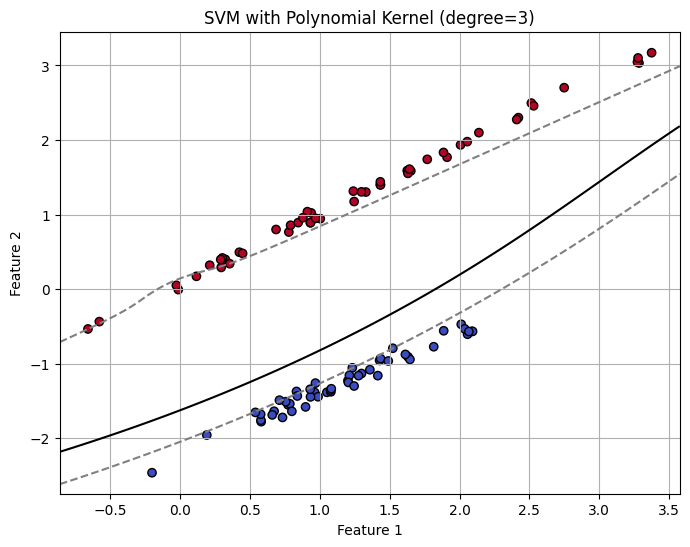

In [30]:
# 24. SVM Classifier with Polynomial Kernel and visualize decision boundary (2D subset)
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate a synthetic 2D dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           class_sep=1.2, random_state=42)

# Train SVM classifier with Polynomial Kernel
model = SVC(kernel='poly', degree=3, C=1.0)
model.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Create meshgrid
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 300),
                     np.linspace(ylim[0], ylim[1], 300))

# Compute decision function over the grid
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Draw the decision boundary and margins
plt.contour(xx, yy, Z, levels=[0], linestyles=['-'], colors='black')
plt.contour(xx, yy, Z, levels=[-1, 1], linestyles=['--'], colors='gray')

plt.title("SVM with Polynomial Kernel (degree=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()



In [6]:
# 25. Gaussian Naïve Bayes on Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.9736842105263158


In [7]:
# 26. Multinomial Naïve Bayes for text classification (20 Newsgroups)
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = fetch_20newsgroups(subset='train', categories=['sci.space', 'comp.graphics'])
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train_vec, y_train)
predictions = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.9858757062146892


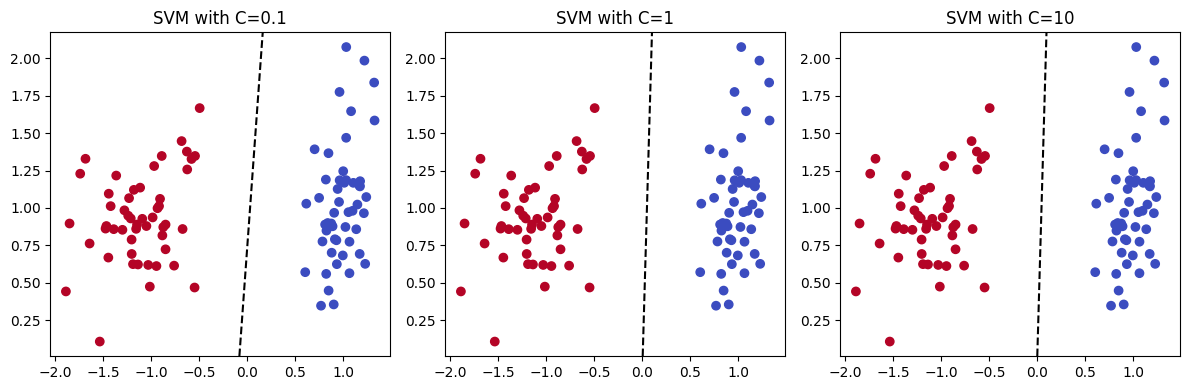

In [8]:
# 27. SVM Classifier with different C values and visualize decision boundaries
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_samples=100, random_state=1)
C_values = [0.1, 1, 10]
plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values):
    clf = svm.SVC(C=C, kernel='linear')
    clf.fit(X, y)
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['--'])
    plt.title(f"SVM with C={C}")
plt.tight_layout()
plt.show()


In [9]:
# 28. Bernoulli Naïve Bayes for binary classification on binary features
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X, y = make_classification(n_features=10, n_informative=5, n_classes=2, random_state=42)
X = (X > 0).astype(int)  # convert to binary features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = BernoulliNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.8333333333333334


In [10]:
# 29. Apply feature scaling before SVM and compare with unscaled
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without scaling
model1 = SVC()
model1.fit(X_train, y_train)
acc1 = model1.score(X_test, y_test)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model2 = SVC()
model2.fit(X_train_scaled, y_train)
acc2 = model2.score(X_test_scaled, y_test)

print("Accuracy without scaling:", acc1)
print("Accuracy with scaling:", acc2)


Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [11]:
# 30. GaussianNB with and without Laplace Smoothing
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
acc_normal = model.score(X_test, y_test)

# Laplace smoothing is not available directly in GaussianNB (only for discrete), so we'll simulate it by adding small value
X_train_smooth = X_train + 1e-9
model2 = GaussianNB()
model2.fit(X_train_smooth, y_train)
acc_smooth = model2.score(X_test + 1e-9, y_test)

print("Without Laplace smoothing:", acc_normal)
print("With Laplace-like smoothing:", acc_smooth)


Without Laplace smoothing: 0.9415204678362573
With Laplace-like smoothing: 0.9415204678362573


In [12]:
# 31. SVM with GridSearchCV to tune hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(SVC(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)


Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.9622784810126582


In [13]:
# 32. SVM on imbalanced dataset with class weighting
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import numpy as np

X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(class_weight='balanced')
model.fit(X_train, y_train)
print("Accuracy with class weighting:", model.score(X_test, y_test))


Accuracy with class weighting: 0.9


In [14]:
# 33. Naïve Bayes spam detection using email data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

emails = ["Free offer just for you", "Meeting at 10", "Win money now", "Lunch with team"]
labels = [1, 0, 1, 0]  # 1 = spam, 0 = ham

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)
model = MultinomialNB()
model.fit(X, labels)
print("Prediction:", model.predict(vectorizer.transform(["Get rich quick!"])))


Prediction: [0]


In [32]:
# 34. Compare SVM and Naïve Bayes on same dataset
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Train Naïve Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Evaluate and compare accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("SVM Accuracy:", svm_accuracy)
print("Naïve Bayes Accuracy:", nb_accuracy)

# Print better model
if svm_accuracy > nb_accuracy:
    print("SVM performed better.")
elif nb_accuracy > svm_accuracy:
    print("Naïve Bayes performed better.")
else:
    print("Both models performed equally.")



SVM Accuracy: 1.0
Naïve Bayes Accuracy: 0.9777777777777777
SVM performed better.


In [29]:
# 35. Feature selection before Naïve Bayes
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

model = GaussianNB()
model.fit(X_new, y_train)
print("Accuracy with feature selection:", model.score(X_test_new, y_test))


Accuracy with feature selection: 0.9814814814814815


In [28]:
# 36. SVM with OvR and OvO strategies
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

ovr = OneVsRestClassifier(SVC())
ovo = OneVsOneClassifier(SVC())

ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

print("OvR Accuracy:", ovr.score(X_test, y_test))
print("OvO Accuracy:", ovo.score(X_test, y_test))


OvR Accuracy: 0.7037037037037037
OvO Accuracy: 0.7592592592592593


In [27]:
# 37. SVM with Linear, Polynomial, and RBF kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    print(f"{kernel} Kernel Accuracy:", model.score(X_test, y_test))


linear Kernel Accuracy: 0.91
poly Kernel Accuracy: 0.91
rbf Kernel Accuracy: 0.91


In [33]:
# 38. SVM with Stratified K-Fold Cross-Validation
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create Stratified K-Fold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create SVM model
svm_model = SVC(kernel='rbf')

# Perform cross-validation and get accuracy for each fold
scores = cross_val_score(svm_model, X, y, cv=skf, scoring='accuracy')

# Print individual fold accuracies and average accuracy
print("Fold Accuracies:", scores)
print("Average Accuracy:", np.mean(scores))


Fold Accuracies: [1.         0.96666667 0.93333333 1.         0.93333333]
Average Accuracy: 0.9666666666666668


In [25]:
# 39. Naïve Bayes with different prior probabilities
model1 = GaussianNB(priors=[0.7, 0.3])
model1.fit(X_train, y_train)
print("Accuracy with priors [0.7, 0.3]:", model1.score(X_test, y_test))

model2 = GaussianNB()
model2.fit(X_train, y_train)
print("Default prior accuracy:", model2.score(X_test, y_test))


Accuracy with priors [0.7, 0.3]: 0.8966666666666666
Default prior accuracy: 0.9166666666666666


In [24]:
# 40. Recursive Feature Elimination (RFE) with SVM
from sklearn.feature_selection import RFE

model = SVC(kernel='linear')
selector = RFE(model, n_features_to_select=10)
selector.fit(X_train, y_train)
print("RFE Accuracy:", selector.score(X_test, y_test))


RFE Accuracy: 0.9066666666666666


In [23]:
# 41. SVM with Precision, Recall, and F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score

pred = model.predict(X_test)
print("Precision:", precision_score(y_test, pred, average='weighted'))
print("Recall:", recall_score(y_test, pred, average='weighted'))
print("F1 Score:", f1_score(y_test, pred, average='weighted'))


Precision: 0.917915817244274
Recall: 0.9166666666666666
F1 Score: 0.9172724231272241


In [22]:
# 42. Naïve Bayes with Log Loss
from sklearn.metrics import log_loss

model = GaussianNB()
model.fit(X_train, y_train)
proba = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, proba))


Log Loss: 0.2741141405339081


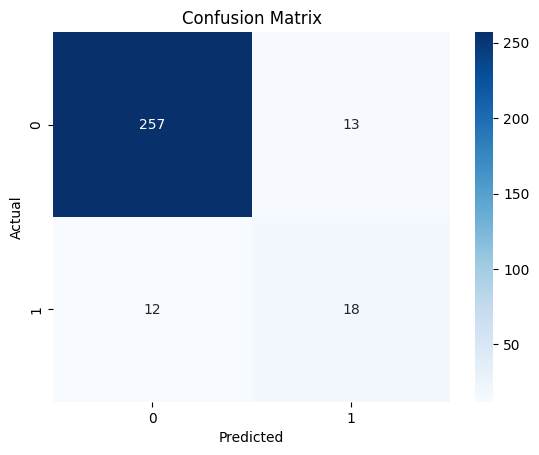

In [21]:
# 43. SVM Confusion Matrix with Seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
# 44. SVR with Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

model = SVR()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, pred))


MAE: 0.16397106276292495


In [18]:
# 45. Naïve Bayes with ROC-AUC score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y, classes=[0, 1])
model = GaussianNB()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, probs))


ROC-AUC Score: 0.881358024691358


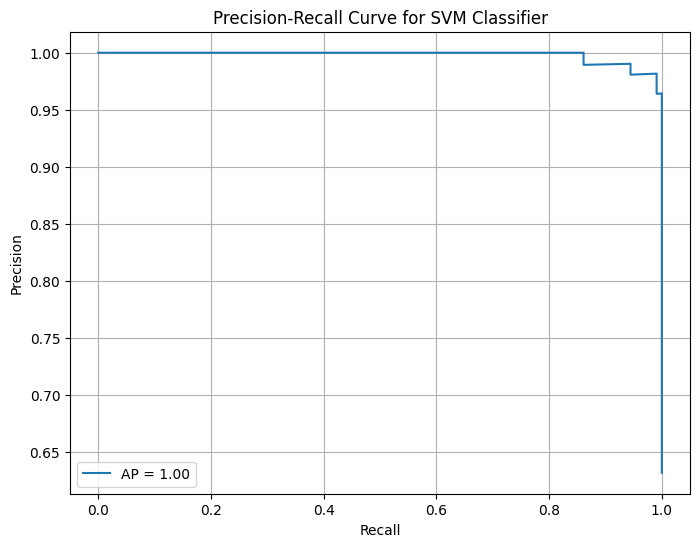

In [34]:
# 46. SVM with Precision-Recall Curve
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load breast cancer dataset (binary classification)
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier with probability=True for decision function
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Get predicted probabilities for positive class
y_scores = svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AP = {average_precision:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for SVM Classifier")
plt.legend()
plt.grid(True)
plt.show()

